### CS 5785 Homework 1
### Ashley Shen (ys778) & Nicole Chussid (njc76)

#### Question #1

In [86]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn import linear_model
import scipy
from scipy.spatial import distance
import random
from sklearn.model_selection import train_test_split
import seaborn as sns



(a)

In [37]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [38]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(b)

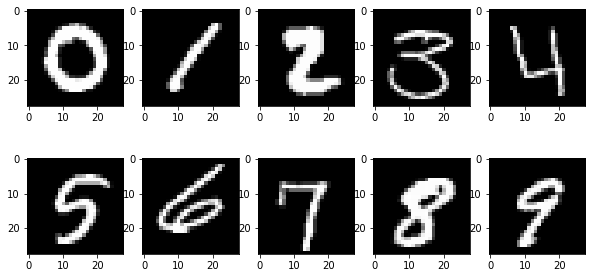

In [40]:
def get_images():
    images = []
    for i in range(0, 10):
        temp = data_train[data_train["label"]==i]
        temp = temp.iloc[0]
        temp= temp.to_numpy()[1:].reshape((28,28))
        images.append(temp)

    plt.figure(figsize=(10,5))
    index=1
    for image in images:
        plt.subplot(2,5, index)
        plt.imshow(image, cmap=plt.cm.gray)
        index += 1
    return 

get_images()

(c)

In [41]:
prob = []
for i in range(10):
    prob.append(len(data_train[data_train['label'] == i])/len(data_train))
pd.DataFrame(prob, columns = ['probability'])

,probability
0,0.098381
1,0.111524
2,0.099452
3,0.103595
4,0.096952
5,0.090357
6,0.098500
7,0.104786
8,0.096738
9,0.099714


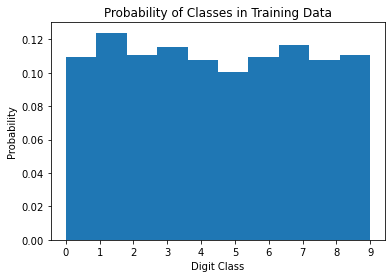

In [42]:
plt.hist(data_train['label'],density=True, bins = 10)
plt.xticks(range(10))
plt.title("Probability of Classes in Training Data")
plt.xlabel("Digit Class")
plt.ylabel("Probability")
plt.show()

(d)

In [43]:
for i in range(10):
    temp = data_train[data_train['label']==i]
    temp = temp.iloc[0]
    temp = data_train[data_train["label"]==i]
    

In [44]:
def best_match(digit,df):
    mainRow = df[df['label']==digit].iloc[0]
    mainRow = mainRow[1:].to_numpy()
    distance=[]
    for row in df.values:
        eachRow = row[1:]
        # calculating euclidean distanve
        dist=np.linalg.norm(mainRow - eachRow)
#         print("dist is", dist)
        distance.append(dist)
#     print(distance)
    min_index = distance.index(min(distance[1:]))
    match_label = df.iloc[min_index].label
    
#     print(min_index)
    print(distance[1])
    return [digit,match_label]
#         min_distance = min
    
pairs = []
for i in range(10):
    pairs.append(best_match(i,data_train))
print("Best match for each example digit",pairs)

0.0
3307.6387348076573
2892.0926679482454
3149.364856602042
3043.9461230448874
3194.1019082051844
3097.9170421429944
3029.5129971663764
3392.539167054671
3293.681526802493
Best match for each example digit [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9]]


(e)

In [114]:
df_0 = data_train.loc[data_train['label'] == 0].drop(['label'], axis = 1).to_numpy()
df_1 = data_train.loc[data_train['label'] == 1].drop(['label'], axis = 1).to_numpy()
df_1 = data_train.loc[data_train['label'] == 1].drop(['label'], axis = 1).to_numpy()

In [115]:
pwd_00= sklearn.metrics.pairwise_distances(df_0, Y=df_0, metric='euclidean')
pwd_00=sklearn.preprocessing.normalize(pwd_00, norm='l2',axis=1, copy=True, return_norm=False)
print(len(pwd_00))

pwd_10= sklearn.metrics.pairwise_distances(df_1, Y=df_0, metric='euclidean')
pwd_10=sklearn.preprocessing.normalize(pwd_10, norm='l2',axis=1, copy=True, return_norm=False)
pwd_10=pwd_10[:4132]
print(len(pwd_10))

pwd_11= sklearn.metrics.pairwise_distances(df_1, Y=df_1, metric='euclidean')
pwd_11=sklearn.preprocessing.normalize(pwd_11, norm='l2',axis=1, copy=True, return_norm=False)
pwd_11=pwd_11[:4132]
print(len(pwd_11))

4132
4132
4132


Text(0.5, 1.0, 'Histogram for Genuine Matches and Imposter Matches')

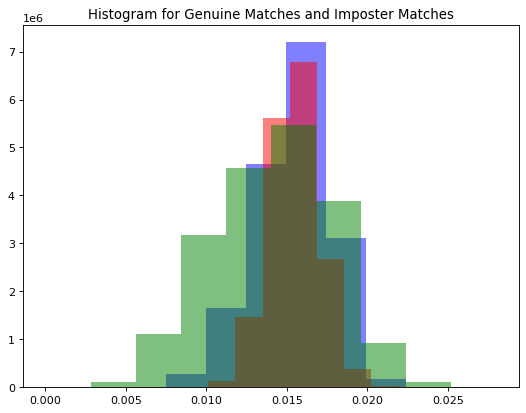

In [119]:
# pair_distance.flatten()
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(pwd_00.flatten(), alpha=0.5,lw=1,color='b')
plt.hist(pwd_10.flatten(), alpha=0.5,lw=1,color='r')
plt.hist(pwd_11.flatten(), alpha=0.5,lw=1,color='g')
plt.title("Histogram for Genuine Matches and Imposter Matches")


(f)

In [120]:
distances= pwd_00.flatten() + pwd_10.flatten() + pwd_11.flatten()

ValueError: operands could not be broadcast together with shapes (17073424,) (19354288,) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


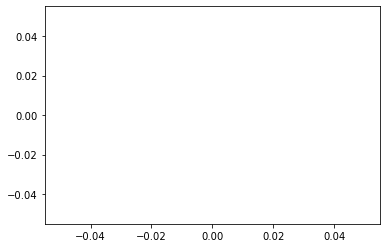

In [117]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(([0]*len(pwd_00)), pwd_00[0])
plt.plot(fpr,tpr)

In [84]:
sklearn.metrics.RocCurveDisplay(fpr, tpr)

TypeError: __init__() takes 1 positional argument but 3 were given

In [135]:
df= data_train.loc[(data_train['label'] == 1) | (data_train['label'] == 0)]
pwd_df= sklearn.metrics.pairwise_distances(df, df, Y=None, metric='euclidean')
pwd_df=pwd_df.flatten()
print(len(pwd_df))
pwd_df

77721856


array([   0.        , 3307.63888597, 2217.55225418, ..., 1279.90273068,
       2812.22011941,    0.        ])

In [134]:
match_array= [0]*len(pwd_01) + [1]*len(pwd_00) + [1]*len(pwd_11)
print(len(match_array))

12948


In [196]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(pwd__00, [0]*len(pwd_00))
plot(fpr,tpr)
plot([0,1],[0,1])
xlabel('fpr')
ylabel('tpr')

NameError: name 'pwd__00' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = model.predict(X_test_data)
roc_auc_score(y_true, y_pred)

(g)

In [68]:
# print(data_train.iloc[0][1:].to_numpy().shape(28,28))

# x = data_train[data_train['label']==0].iloc[0]
# y = data_train[data_train['label']==0].iloc[1:]

def bestMatchRows(df,row1,K):
    distance=[]
    for index,row in enumerate(df.values):
        eachRow = row[1:]
        # calculating euclidean distanve
#         eachRow = row1
        dist=np.linalg.norm(row1 - eachRow) 
        distance.append((index,dist,df.iloc[index].label))
    
    distance.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(K):
        neighbors.append(distance[i])
    
    return neighbors




In [71]:
neighbors

NameError: name 'neighbors' is not defined

In [69]:
# def makePrediction(numNeighbors,trainData,testRow):
#     neighbors = bestMatchRows(trainData, testRow, numNeighbors)
#     distanceVals = [row[-1] for row in neighbors]
#     myPrediction = max(set(distanceVals), key=distanceVals.count)
#     return (myPrediction)
def makePrediction(numNeighbors,trainData,testRow):
    realLabel = testRow.label
    testRow = testRow[1:]
    neighbors = bestMatchRows(trainData, testRow, numNeighbors)
    distanceVals = [row[-1] for row in neighbors]
    myPrediction = max(set(distanceVals), key=distanceVals.count)
    return ([myPrediction,realLabel])



# Generate some random test rows
testRow1 = data_train.iloc[500]


K = 5 #Set K value for KNN

myPrediction1 = makePrediction(K,data_train,testRow1)


print("My prediction is",myPrediction1[0]," expected",myPrediction1[1])


# print("nearest neighbors are",neighbors)

actualLabel = data_train.iloc[neighbors[0][0]].label

for index,value in neighbors:
    if actualLabel == data_train.iloc[index].label:
        print("INDEX",index,"with error value",value,"is CORRECT in identifying the label")
    else:
        print("INDEX",index,"with error value",value,"is INCORRECT in identifying the label")
neighbors

My prediction is 6  expected 6


NameError: name 'neighbors' is not defined

In [22]:
type(testRow1)

pandas.core.series.Series

In [23]:
print("My prediction is",myPrediction1[0]," expected",myPrediction1[1])

My prediction is 6  expected 6


In [167]:
training_data, testing_data = train_test_split(data_train.sample(5000), test_size=0.5, random_state=25)


In [168]:
# k = 2
training_data.reset_index(drop=True)
correct = 0
i = 0
for i in range(len(training_data)):
    row = training_data.iloc[i]
    prediction = makePrediction(4,training_data,row)
    if prediction[0]==prediction[1]:
        correct += 1
    i += 1
accuracy = correct/len(training_data)
print(accuracy)

KeyboardInterrupt: 

In [ ]:
# k = 3 
training_data.reset_index(drop=True)
correct = 0
i = 0
for i in range(len(training_data)):
    row = training_data.iloc[i]
    prediction = makePrediction(3,training_data,row)
    if prediction[0]==prediction[1]:
        correct += 1
    i += 1

In [ ]:
accuracy = correct/len(training_data)
print(accuracy)

In [ ]:
# k = 4 
training_data.reset_index(drop=True)
correct = 0
i = 0
for i in range(len(training_data)):
    row = training_data.iloc[i]
    prediction = makePrediction(4,training_data,row)
    if prediction[0]==prediction[1]:
        correct += 1
    i += 1
accuracy = correct/len(training_data)
print(accuracy)

In [ ]:
# k = 5 
training_data.reset_index(drop=True)
correct = 0
i = 0
for i in range(len(training_data)):
    row = training_data.iloc[i]
    prediction = makePrediction(5,training_data,row)
    if prediction[0]==prediction[1]:
        correct += 1
    i += 1
accuracy = correct/len(training_data)
print(accuracy)

In [ ]:
data_train.sample(30)

In [ ]:
# test on the testing dataset 
correct = 0
i = 0
true = []
pred = []
for i in range(len(testing_data)):
    row = training_data.iloc[i]
    prediction = makePrediction(3,training_data,row)
    true.append(prediction[1])
    pred.append(prediction[0])
    if prediction[0]==prediction[1]:
        correct += 1
    i += 1
accuracy = correct/len(training_data)
print(accuracy)
